In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec  6 16:32:09 2021

@author: eleni.apostolopoulou
"""
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #We use the ordinal encoder for the labels as there are only two values and it will work for what we need. 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.metrics                 import accuracy_score

df=pd.read_excel('member_needs.xlsx') #Import data into a dataframe



In [4]:
df.head()

,Text,Tag,Tag - Color,Tag - Group,Tag - Board,Note - Title,Note - Group,Note - Board,Note - Country,Note - Account,Note - Sector,Note - Account type,Note - Status,Insights,Created,URL
0,Cyber essentials,Cyber Essentials + Plus,#a00064,Cyber security,Digital Infrastructure,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
1,Cyber security Assessment,Cyber security review/assessment,#230078,Cyber security,Digital Infrastructure,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
2,Cyber security Assessment,Review/Audit,#a00064,Capacity building,Tags,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
3,10Gb connection,Connectivity (general),#230078,Network and connectivity,Digital Infrastructure,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
4,Building Digital Capability,Digital capabilities,#a00064,Digital skills and capabilities,Tags,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...


In [5]:
print(df['Tag'].unique())

['Cyber Essentials + Plus' 'Cyber security review/assessment'
 'Review/Audit' 'Connectivity (general)' 'Digital capabilities'
 'Cyber security support (general)' 'Maximise Jisc membership'
 'Cost-effective/innovative solutions' 'Financial/resource constraints'
 'Intersite connectivity' 'Cloud support' 'Campus redevelopment'
 'Managed SIEM' 'Consultancy/retained expertise' 'e-Books for FE'
 'DLR usage' 'Digital resources (general)' 'Digital pedagogy'
 'BDC service' 'Learner experience' 'Trust and identity'
 'Virtual classroom' 'Curriculum resources' 'Systems migration'
 'Telephony' 'Access to resources' 'Pen testing' 'Strategy support'
 'IT/technical skills deficit' 'Advice and guidance' 'Frameworks'
 'Critical Services Protection' 'Resources management' 'Learning spaces'
 'Data and analytics' 'VLR' 'Network security and resilience' 'Training'
 'Wifi' 'ISO27001' 'Assistive technologies' 'Staff recruitment issues'
 'Accessibility' 'Infrastructure support' 'Certificates' 'VLE'
 'Procureme

In [6]:
#split the data into train and test set
from sklearn.model_selection         import train_test_split
text = df.Text
tags = df.Tag
train_features, test_features, train_labels, test_labels = train_test_split(text, tags, test_size=0.20, random_state=42,shuffle=True)

In [7]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  1252
lenght of test data =  314


In [8]:
from sklearn.feature_extraction import text
from sklearn                         import preprocessing
from sklearn.preprocessing           import LabelEncoder


In [10]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stephanie.tuohey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#uni gram
uni_vector =   text.CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=en_stop, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)
bag_of_words_uni.shape

(1252, 1000)

In [12]:
#bigram
bi_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=en_stop, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)
#trigram
tri_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=en_stop, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)
#3chargram
char3_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=en_stop, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)
#4chargram
char4_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=en_stop, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)


In [64]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()

C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
uni_train_features[:5]

,000,10,100gb,10gb,120k,19,1gb,2,20,2019,...,without,worcester,work,working,world,would,x,year,years,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)

In [67]:
from sklearn.ensemble                import RandomForestClassifier

#apply RandomForestClassifier on train dataset
rfc_uni = RandomForestClassifier(max_depth= 50, max_features= 8, n_estimators= 200)                      
rfc_uni.fit(uni_train_features, train_labels)

rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels)

rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels)

rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels)

rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels)

RandomForestClassifier()

In [46]:


param_grid = [
 # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [ 50,100, 200], 'max_features': [2, 4, 6, 8], 'criterion': ['gini','entropy'],'max_depth' : [10,20]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [50,100], 'max_features': [2, 3, 4],'criterion': ['gini','entropy'],'max_depth' : [10,20]},
  ]
grid = GridSearchCV(rfc_uni,param_grid, cv=10,return_train_score=True) 





grid.fit(uni_train_features, train_labels)
forest = grid.best_estimator_

C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [47]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 8, 'n_estimators': 200}


In [68]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)
char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)
char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

In [40]:
from sklearn.metrics                 import accuracy_score

In [69]:
predictions_uni_rfc = rfc_uni.predict(uni_test_features)         #prediction
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)           #accuracy

predictions_bi_rfc = rfc_bi.predict(bi_test_features)         #prediction
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)           #accuracy

predictions_tri_rfc = rfc_tri.predict(tri_test_features)         #prediction
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc)           #accuracy

predictions_char3_rfc = rfc_char3.predict(char3_test_features)         #prediction
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc)           #accuracy

predictions_char4_rfc = rfc_char4.predict(char4_test_features)         #prediction
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)           #accuracy

In [17]:
!pip install prettytable

In [70]:
from prettytable                     import PrettyTable
from astropy.table                   import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2)])

In [71]:
print("Detailed performance of all models:")
print(Model_Table)

Detailed performance of all models:
+-----------------+---------------------------------+
|                 |    Random forest Classififier   |
+-----------------+---------------------------------+
|     Uni Gram    |               0.45              |
|     Bi Gram     |               0.36              |
|     Tri Gram    |               0.18              |
|   3 Char Gram   |               0.43              |
|   4 Char Gram   |               0.41              |
+-----------------+---------------------------------+


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleni.apo

                                     precision    recall  f1-score   support

                Access to resources       0.00      0.00      0.00         3
                      Accessibility       0.00      0.00      0.00         0
                Advice and guidance       0.00      0.00      0.00         4
                         Assessment       0.00      0.00      0.00         1
                        BDC service       0.00      0.00      0.00         8
                Business continuity       0.00      0.00      0.00         1
               Campus redevelopment       0.00      0.00      0.00         2
                      Cloud support       0.53      0.74      0.62        23
             Connectivity (general)       0.53      0.80      0.64        10
     Consultancy/retained expertise       0.00      0.00      0.00         8
Cost-effective/innovative solutions       0.25      0.14      0.18         7
       Critical Services Protection       0.00      0.00      0.00         

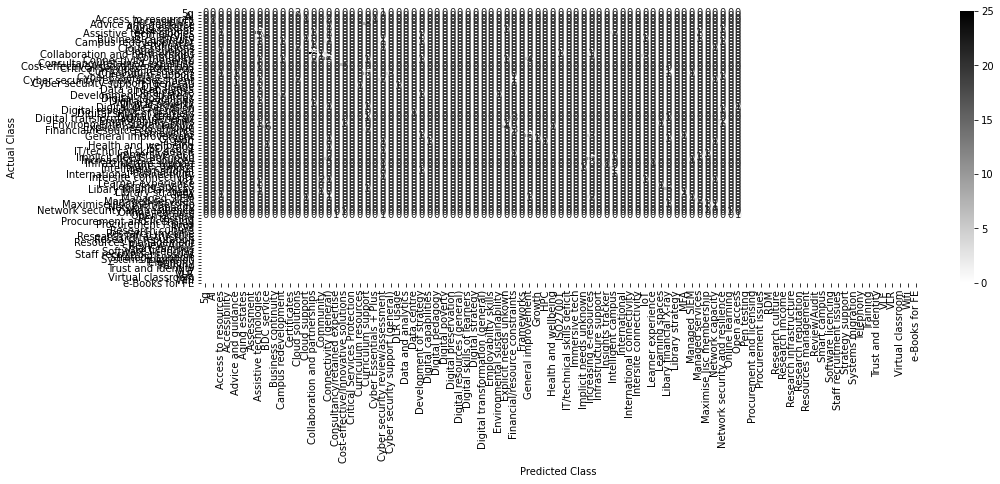

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
print(classification_report(test_labels, predictions_uni_rfc))
plt.figure(figsize = (16,5))
sns.heatmap(confusion_matrix(test_labels, predictions_uni_rfc), annot=True, fmt='1', xticklabels=rfc_uni.classes_, yticklabels=rfc_uni.classes_, cmap='binary')

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [73]:
comment = ["Need to reinforce LA at a level higher than IT leadership, not enough institutional drive to implement this"]

In [76]:

model=rfc_uni.fit(uni_train_features, train_labels)
user_input= uni_vector.transform(comment)
a=user_input.toarray()
user_input=pd.DataFrame(a, columns=uni_feature_names)
# fit the model on input
tag = model.predict(user_input) 

In [79]:
tag

array(['Data and analytics'], dtype=object)